In [23]:
from tensorflow.keras.preprocessing import  image_dataset_from_directory
from tensorflow.keras.datasets import imdb
import numpy as np
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop


## Part 1

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images = train_images.astype(np.float32)
train_images /= 255.0
train_labels = to_categorical(train_labels)

In [5]:
test_images = test_images.astype(np.float32)
test_images /= 255.0
test_labels = to_categorical(test_labels)

In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))

/Users/jakubwasik/Documents/univeristy/machine-learning-2/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,744 (217.75 KB)

 Trainable params: 55,744 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8551 - loss: 0.4429
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9838 - loss: 0.0522
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9894 - loss: 0.0336
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9924 - loss: 0.0249
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9941 - loss: 0.0186


In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
 
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9781 - loss: 0.0778
test_acc: 0.9815999865531921


In [14]:
history_dict = history.history

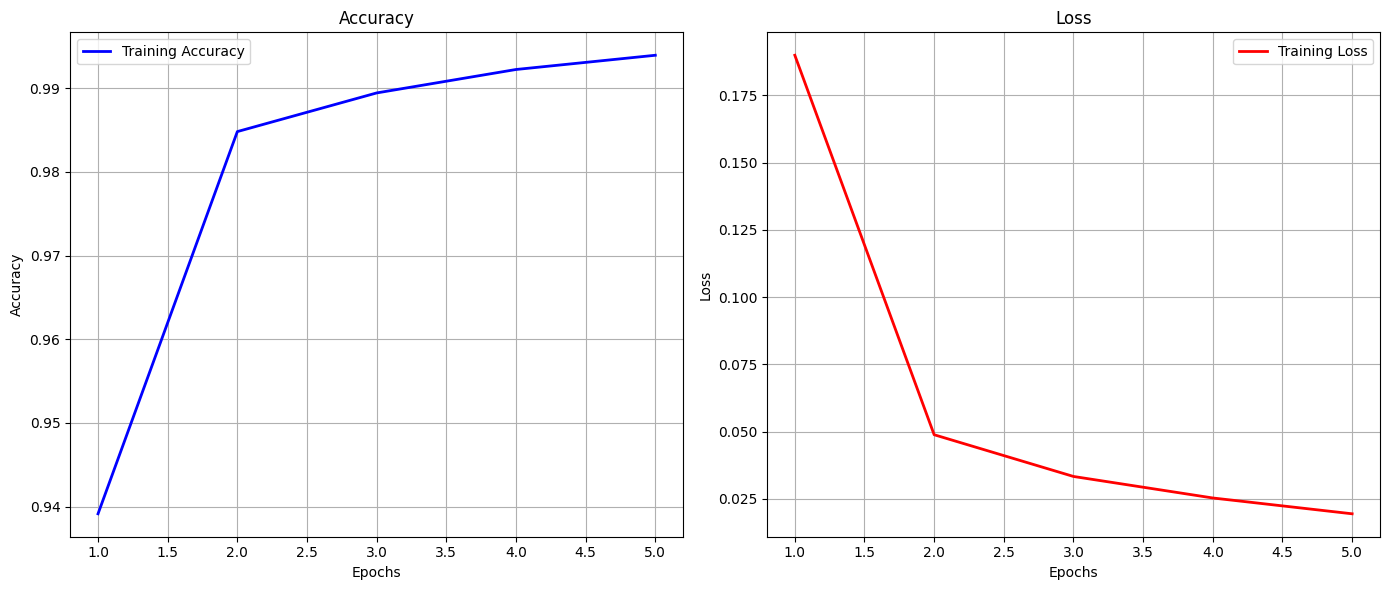

In [19]:
x_vector = np.linspace(1,len(history_dict['accuracy']),len(history_dict['accuracy']))

plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 2, 1)
plt.plot(x_vector, history_dict['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(x_vector, history_dict['loss'], label='Training Loss', color='red', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss')

plt.tight_layout() 
plt.show()

## Part 2

In [20]:
model_binary = models.Sequential()
model_binary.add(layers.Rescaling(1./255, input_shape=(150,150,3)))
model_binary.add(layers.Conv2D(32, (3,3), activation='relu'))
model_binary.add(layers.MaxPool2D((2,2)))
model_binary.add(layers.Conv2D(64, (3,3), activation='relu'))
model_binary.add(layers.MaxPool2D((2,2)))
model_binary.add(layers.Conv2D(128, (3,3), activation='relu'))
model_binary.add(layers.MaxPool2D((2,2)))
model_binary.add(layers.Conv2D(128, (3,3), activation='relu'))
model_binary.add(layers.MaxPool2D((2,2)))
model_binary.add(layers.Flatten())
model_binary.add(layers.Dense(512, activation='relu'))
model_binary.add(layers.Dense(1, activation='sigmoid'))

/Users/jakubwasik/Documents/univeristy/machine-learning-2/.venv/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model_binary.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model_binary.compile(optimizer=RMSprop(learning_rate=1e-4),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [29]:
train_dataset = image_dataset_from_directory(
    '/Users/jakubwasik/Documents/univeristy/machine-learning-2/main_directory/train',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=20,
    image_size=(150,150),
    shuffle=True
)

# test_dataset = image_dataset_from_directory(
#     '/Users/jakubwasik/Documents/univeristy/machine-learning-2/main_directory/test',
#     labels='inferred',
#     label_mode='binary',
#     class_names=None,
#     color_mode='rgb',
#     batch_size=20,
#     image_size=(150,150),
#     shuffle=True
# )

validation_dataset = image_dataset_from_directory(
    '/Users/jakubwasik/Documents/univeristy/machine-learning-2/main_directory/validation',
    labels='inferred',
    label_mode='binary',
    class_names=None,
    color_mode='rgb',
    batch_size=20,
    image_size=(150,150),
    shuffle=True
)

Found 2004 files belonging to 2 classes.
Found 1002 files belonging to 2 classes.


In [30]:
history_binary = model_binary.fit(train_dataset, epochs=30, validation_data=validation_dataset)

Epoch 1/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 209ms/step - accuracy: 0.5109 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.7524
Epoch 2/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 203ms/step - accuracy: 0.5637 - loss: 0.6863 - val_accuracy: 0.5988 - val_loss: 0.6604
Epoch 3/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step - accuracy: 0.6006 - loss: 0.6616 - val_accuracy: 0.6277 - val_loss: 0.6429
Epoch 4/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 24s 234ms/step - accuracy: 0.6534 - loss: 0.6281 - val_accuracy: 0.6118 - val_loss: 0.6408
Epoch 5/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 220ms/step - accuracy: 0.6786 - loss: 0.5899 - val_accuracy: 0.6078 - val_loss: 0.6821
Epoch 6/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 22s 215ms/step - accuracy: 0.7224 - loss: 0.5620 - val_accuracy: 0.6727 - val_loss: 0.5895
Epoch 7/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - accuracy: 0.7285 - loss: 0.5367 - val_accuracy: 0.6507 - val_loss: 0.6690
Epoch 8/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 24s 234ms/step - accuracy: 0.7423 - loss: 0

In [31]:
history_binary_dict = history_binary.history

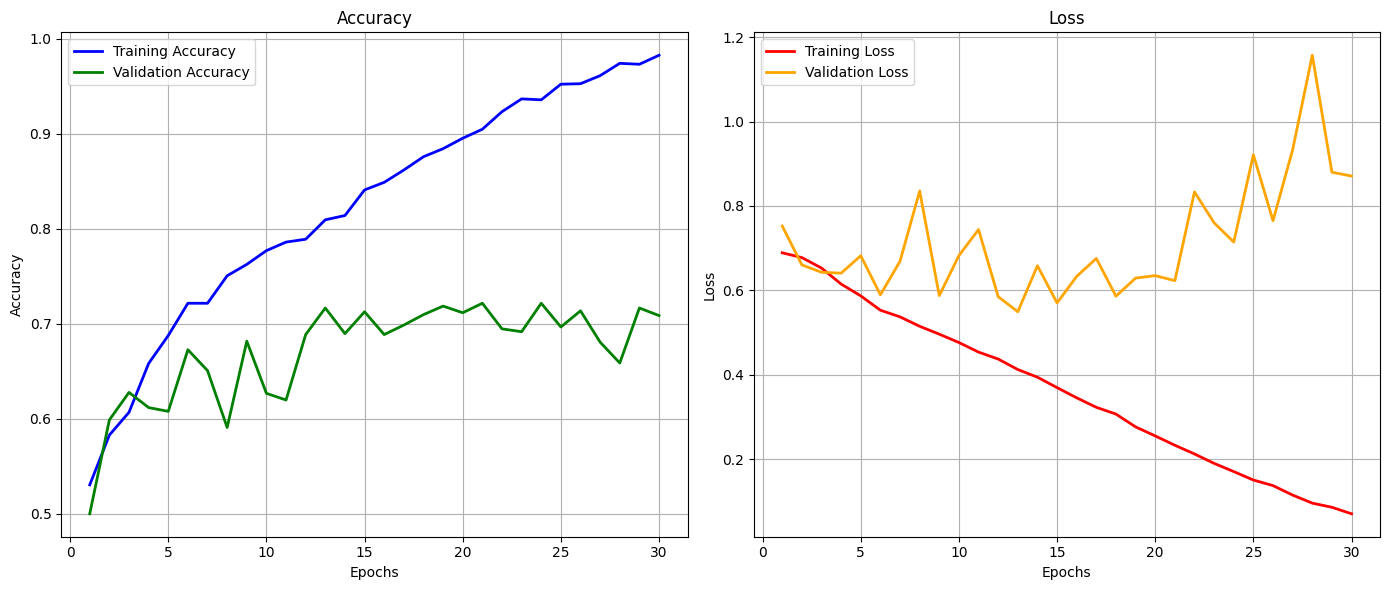

In [32]:
x_vector = np.linspace(1,len(history_binary_dict['accuracy']),len(history_binary_dict['accuracy']))

plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 2, 1)
plt.plot(x_vector, history_binary_dict['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
plt.plot(x_vector, history_binary_dict['val_accuracy'], label='Validation Accuracy', color='green', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(x_vector, history_binary_dict['loss'], label='Training Loss', color='red', linewidth=2)
plt.plot(x_vector, history_binary_dict['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Loss')

plt.tight_layout() 
plt.show()

In [33]:
test_loss_binary, test_acc_binary = model_binary.evaluate(test_dataset)
print(f"Achieved loss: {test_loss_binary} and accuracy: {test_acc_binary}")

51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.7116 - loss: 0.9026
Achieved loss: 0.8709264397621155 and accuracy: 0.7085828185081482
